# Text Mining With Python

Quick introduction to text mining with Python, specifically nltk. 

nltk is the 'Natural Language ToolKit', and is the biggest text-analysis package in Python: http://www.nltk.org

nltk is huge. It doesn't have a quick tutorial, instead it comes with a book. Seriously: http://www.nltk.org/book/

Needless to say, this is merely a brief outline of some text-mining functionality, and you should head to the official documentation for a fuller description. 

The full functionality of nltk goes beyond just installing the package, it includes a GUI (a graphical interface to do things) and a lot of data and tools, such as lists of words you might want to exclude from your corpus. 
Once you install the package, you will need to download extra things to use certain parts of the toolbox. 

Here, I am going to follow along with a couple examples covered in the book, so you can download 'book' and have everything you need for this notebook, and if anything is confusing, you can look for more explanation in the book. 

Why would we want to do text analysis / mining in Data Science? Applications include:
- Sentiment Analysis
- Spam Filters
- Measuring Similarity of Texts
- Categorizing Documents
- Phase Extraction
- Automatic Summaries of Texts
- Word/Phrase Frequency Analysis
- Examining Language Trends over Time

In [48]:
# Import nltk
import nltk

# Add pylab
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# The full functionality of nltk requires extra downloads.
# The first chapter of the nltk covers this if this notebook doesn't provide enough info: http://www.nltk.org/book/ch01.html

# This command launches a pop-up from which you can download the extra things that come with nltk
# Here, I am going to follow along with some of the examples from the book, so you can start with clicking on and downloading
# the part called 'book' in the pop-up window. 
# You should only need to do this once. 
nltk.download()

showing info http://nltk.github.com/nltk_data/


True

In [2]:
# Now that we've downloaded the stuff from the book, we want to load it. 
# Let's import everything from the book.
from nltk.book import *

# Note that 'from x import *' reads like 'from package x, import everything' and is considered bad practice in general. 
# The problem is that importing all functions blindly like this increases the risk for name conflicts, which is when two things
# (for example two functions) have the same name which confuses Python, as it doesn't know which one to use. 
# We are going to ignore this for now - but keep it in mind for how you go about importing packages. 

# This will load a whole bunch of example texts from the book that we can experiment with. 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
# Before we jump into things from the book, let's look at some simple examples of the kinds of things we might 
# want to do with nltk.

# Let's start with a practice sentence.
sentences = 'Data science is a bit like magic. If you know the right spells (Python commands) you can (try to) predict the future.'

In [4]:
# Text mining comes with it's own vocabulary. 
# Notice that in the above we have a single variable which is really just a long vector of characters. 
# We know that it contains words. But Python doesn't. 
# We typically want to break a continuous stream of characters into words. This is called 'Tokenization'
#      https://en.wikipedia.org/wiki/Tokenization_(lexical_analysis)

# Lets 'tokenize' our sentence. We can do that in different ways. 
sentence_tokens = nltk.sent_tokenize(sentences)
word_tokens = nltk.word_tokenize(sentences)

# Let's have a look at the results. In both cases we get a list of tokens out. 
# The difference is how we split up our data. We can tokenize into sentences, or into words
print type(sentence_tokens)
print type(word_tokens)
print 'Sentence Tokens: ', sentence_tokens
print 'Word Tokens: ', word_tokens

<type 'list'>
<type 'list'>
Sentence Tokens:  ['Data science is a bit like magic.', 'If you know the right spells (Python commands) you can (try to) predict the future.']
Word Tokens:  ['Data', 'science', 'is', 'a', 'bit', 'like', 'magic', '.', 'If', 'you', 'know', 'the', 'right', 'spells', '(', 'Python', 'commands', ')', 'you', 'can', '(', 'try', 'to', ')', 'predict', 'the', 'future', '.']


In [5]:
# Once we tokenize, we can start trying to figure out what kinds of words we have. 
# This is called 'Part of Speech' tagging. - https://en.wikipedia.org/wiki/Part-of-speech_tagging
# That is we can try to label our tokens in terms of what part of the sentence they represent.
tagged = nltk.pos_tag(word_tokens)
print tagged[0:8]

[('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('bit', 'NN'), ('like', 'IN'), ('magic', 'JJ'), ('.', '.')]


What we've done here is label each word with it's 'type'
For example:
    'NNP' is 'Noun Proper Singular
    'NN' is 'Noun, common, singular or mass'
    'VBZ' IS 'Verb, present tense'

Although not perfect, this allows us to classify all the words into a given text into the type of words we have. 
We can then start asking questions, for example:
    - Do different cultural groups (same language) use different proportions of nouns, verbs and adjectives?
    - If we take just the adjectives from presidential speech, and run sentiment analysis, are they positive or negative?
    - Do popular authors use different vocabularies from unsuccessful authors? Different how?

In [6]:
# Note that this data already takes a fair amount of linguistic knowledge to interpret. 
# Luckily, we don't have to memorize the tag labels. 
# Currently we are using the Penn tagset, and we can ask what each tag means
print nltk.help.upenn_tagset('DT')
print nltk.help.upenn_tagset('IN')

# Running this command with no argument gives a list of all the tag labels used. 
#print nltk.help.upenn_tagset()

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
None


In [55]:
# Let's start having a quick look at one of the texts that comes with the nltk book. 

# Lets look at text 6. These texts are stored as a 'Text' class. 
print type(text6)
print text6.name

<class 'nltk.text.Text'>
Monty Python and the Holy Grail


In [190]:
# Let's have a look at a couple asp

# We can count how often a particular word occurs
print 'Count of the word \'knight\': '
print text6.count('knight'), '\n'

# We can ask what words tend to occur together
print 'Words that tend to co-occur: '
text6.collocations()
print '\n'

# We can also print out the context in which a word is used
print 'Words in context: '
text6.concordance('science')
print '\n'

# The text class already has the text tokenized for us. 
print 'Tokens from the text: '
print text6.tokens[0:5], '\n'

# And we can sort our list of tokens if we want as well
print 'Sorted tokens from the text: '
print sorted(text6.tokens)[0:5]

Count of the word 'knight': 
5 

Words that tend to co-occur: 
BLACK KNIGHT; clop clop; HEAD KNIGHT; mumble mumble; Holy Grail;
squeak squeak; FRENCH GUARD; saw saw; Sir Robin; Run away; CARTOON
CHARACTER; King Arthur; Iesu domine; Pie Iesu; DEAD PERSON; Round
Table; clap clap; OLD MAN; dramatic chord; dona eis


Words in context: 
Displaying 1 of 1 matches:
 you who are so wise in the ways of science ? ARTHUR : I am Arthur , King of th


Tokens from the text: 
[u'SCENE', u'1', u':', u'[', u'wind'] 

Sorted tokens from the text: 
[u'!', u'!', u'!', u'!', u'!']


Most Common Tokens in Holy Grail: 
[(u':', 1197), (u'.', 816), (u'!', 801), (u',', 731), (u"'", 421), (u'[', 319), (u']', 312), (u'the', 299), (u'I', 255), (u'ARTHUR', 225), (u'?', 207), (u'you', 204), (u'a', 188), (u'of', 158), (u'--', 148), (u'to', 144), (u's', 141), (u'and', 135), (u'#', 127), (u'...', 118)] 



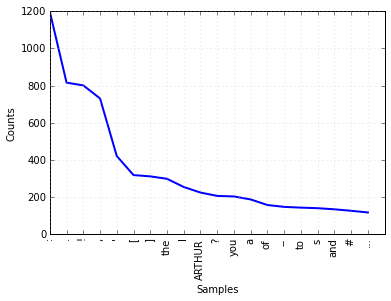

In [177]:
# We can take a Frequency Distribution of the 
monty_freq_dist = nltk.FreqDist(text6)

# Print out a list of the most common words
print 'Most Common Tokens in Holy Grail: '
print monty_freq_dist.most_common(20), '\n'

# Plot the first 20 items of the Frequency Distribution
monty_freq_dist.plot(20)

#### Data Cleaning / Stopwords

What we see immediately is that this is not at all helpful. All we see are punctuation, and uninformative words like 'a' and 'the'. 

Not all words are equal in text analysis. Some words, like 'the' don't really convey any meaning, and we want to ignore them. 
We call the uninteresting words 'stopwords'. 

We need to clean our data to get rid of all the stopwords and punctuation. Luckily nltk has tools to do this. We are going to import their list of stopwords, compare this list to our text, and only keep words from our text if the words do not appear in our list of stopwords. 

Note: there are other ways to tokenize that wouldn't include punctuation in the first place. In practice, one may want to tokenize differently, rather than keep punctuation and then have to work to remove them later. 


In [161]:
# Import the list of stopwords from nltk
from nltk.corpus import stopwords

In [171]:
# Let's clean our data

# Loop through our text, only keeping words that are not a stopword
# Initialize a new list to keep our good data
words_stop_removed = list()
# Loop through our tokenized text
for word in text6.tokens:
    # If the word is not in our stopword list, add it to our cleaned list
    # Note that we are forcing everything to be lowercase so that 'The' and 'the' are treated the same
    if word.lower() not in stopwords.words('english'):
        words_stop_removed.append(word.lower())

# Loop through our words, only keeping words that are longer than 3 characters (to remove punctuation)
# Intialize a new list to keep our final cleaned data
words_stop_punc_removerd = list()
# Loop through our stopword cleaned data
for word in words_stop_removed:
    # If the word is longer than 3 characters, add it to our list of cleaned words
    if (len(word) > 3):
        words_stop_punc_removerd.append(word)

# If the above feels like a lot of code to do what we wanted, it is. 
# There is a much shorter (in terms of lines of code) way to do it. 
# However, it is much harder to read what the code does. 
# Remember, writing readable code is really important! 
# For shareable code, that others can read, the above approach is better. 
# That being said, this line does the same as the above block of code:
filtered_words = [w.lower() for w in text6.tokens if ((not w.lower() in stopwords.words('english')) & (len(w) > 3))]

Most Common Tokens in Holy Grail: 
[(u'arthur', 261), (u'launcelot', 101), (u'knight', 84), (u'galahad', 80), (u'father', 75), (u'bedevere', 67), (u'knights', 65), (u'well', 62), (u'head', 59), (u'robin', 58), (u'right', 55), (u'guard', 55), (u'villager', 47), (u'boom', 45), (u'come', 44), (u'witch', 41), (u'away', 39), (u'clop', 39), (u'grail', 39), (u'king', 38)] 



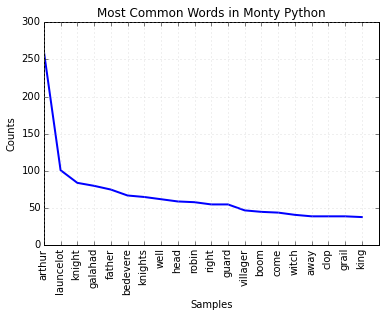

In [176]:
# Now we can try again with our Frequency Distribution analysis, on the cleaned data
# Calculate Frequency Distribution on Cleaned Data
filtered_monty_freq_dist = nltk.FreqDist(filtered_words)

# Print out a list of the most common words
print 'Most Common Tokens in Holy Grail: '
print filtered_monty_freq_dist.most_common(20), '\n'

# Plot the first 20 items of the Frequency Distribution
filtered_monty_freq_dist.plot(20, title="Most Common Words in Monty Python")

# This looks more like it! This is actually informative!
# We can actually figure out something about this text from this list
# Note that this text is a movie script, which explains why names are so common
#  Each line of dialogue starts with the character's name who says the line

#### Wrapping Up

In some ways, most of textual analysis really start after what we've done so far. 

Having a cleaned 'bag of words' is a starting point for analyzing and classifying texts. 

Or, we might tokenize texts (like tweets or reviews) into sentences and run sentiment analysis. 

We might try to use words in context to automatically interpret or translate texts. 

All of these things are huge areas of research, and too complicated to dive into here. Hopefully, what is here gives you a glimpse of what this type of analysis looks like, and if you are interested in further analyses, you can continue with the nltk book and/or research 'natural language processing' in general.